<a href="https://colab.research.google.com/github/pandharkardeep/Compute_tasks_Deep_P/blob/main/LOGREGTAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_study.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

In [ ]:
df['prevalentStroke'].unique()
(df.index[df['prevalentStroke'] == 1]).tolist()

[255,
 475,
 646,
 763,
 1044,
 1553,
 1624,
 1975,
 2036,
 2204,
 2461,
 2471,
 2682,
 2756,
 3088,
 3136,
 3314,
 3493,
 3604,
 3671,
 3741,
 3793,
 3927,
 3952,
 4035]

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

In [ ]:
df.drop(['prevalentStroke','BPMeds','diabetes','education'],axis = 'columns',inplace = True)

In [ ]:
df.rename(columns = {'male':'sex_male'},inplace = True)

In [ ]:
df.head()

,sex_male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex_male       4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   prevalentHyp   4240 non-null   int64  
 5   totChol        4190 non-null   float64
 6   sysBP          4240 non-null   float64
 7   diaBP          4240 non-null   float64
 8   BMI            4221 non-null   float64
 9   heartRate      4239 non-null   float64
 10  glucose        3852 non-null   float64
 11  TenYearCHD     4240 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 397.6 KB


In [ ]:
df.isna().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay        29
prevalentHyp       0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
TenYearCHD         0
dtype: int64

In [ ]:
df['cigsPerDay'].fillna(0,inplace = True)

In [ ]:
df['glucose'].fillna(70,inplace =True)

In [ ]:
mean = df['totChol'].mean()
df['totChol'].fillna(mean,inplace = True)

In [ ]:
mean2 = df['BMI'].mean()
df['BMI'].replace(mean,mean2,inplace = True)
df['heartRate'].fillna(90)

0       80.0
1       95.0
2       75.0
3       65.0
4       85.0
        ... 
4235    84.0
4236    86.0
4237    80.0
4238    67.0
4239    85.0
Name: heartRate, Length: 4240, dtype: float64

In [ ]:
df.isnull().sum()

sex_male         0
age              0
currentSmoker    0
cigsPerDay       0
prevalentHyp     0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

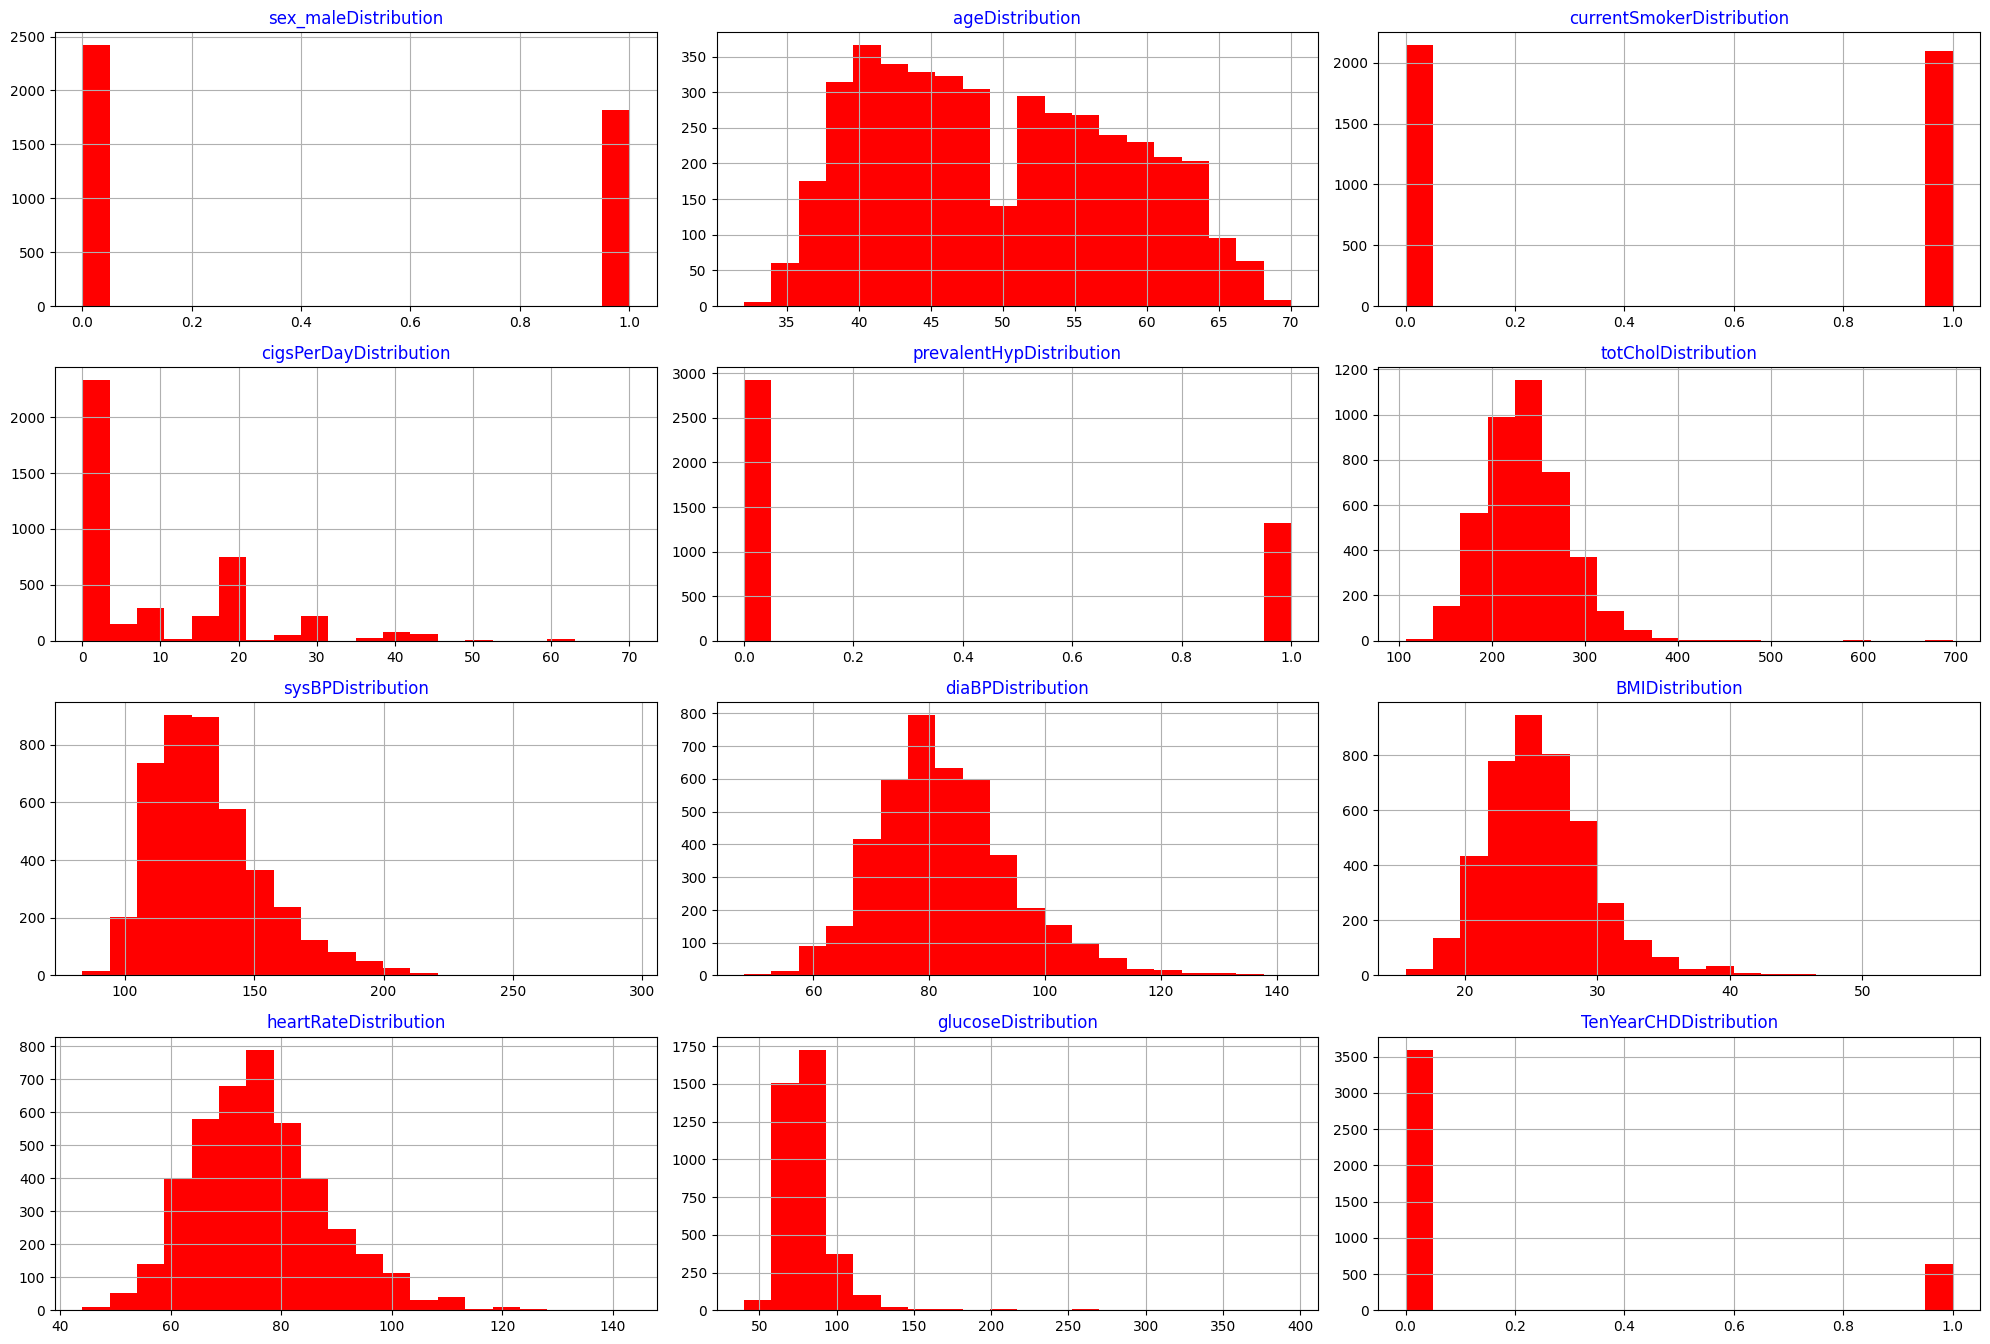

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

In [ ]:
df.head()

,sex_male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

Text(0.5, 1.0, 'No. off People with risk of CHD')

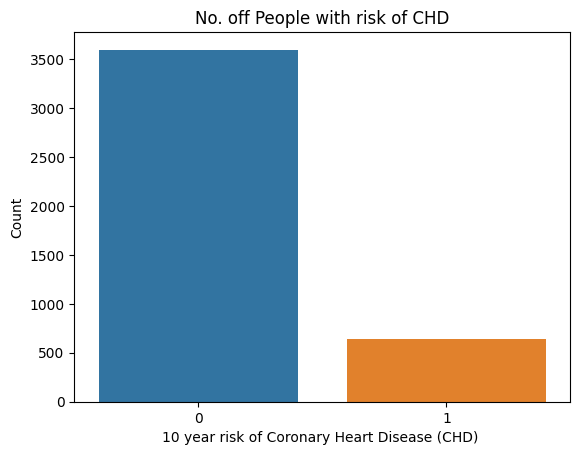

In [ ]:
sns.countplot(x = df['TenYearCHD'],data = df)
plt.xlabel('10 year risk of Coronary Heart Disease (CHD) ')
plt.ylabel('Count')
plt.title('No. off People with risk of CHD')


In [ ]:
df.head()

,sex_male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('TenYearCHD',axis = 'columns')
y = df['TenYearCHD']
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size = 0.25,random_state = 69)

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link.

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [ ]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.379244
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4228
Method:                           MLE   Df Model:                           11
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.1097
Time:                        17:01:38   Log-Likelihood:                -1608.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.886e-78
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.3577      0.627    -13.319      0.000      -9.588      -7.128
sex_male          0.4980      0.100      4.981      0.000       0.302       0.694
age               0.0630      0.006     10.232      0.000       0.051       0.075
currentSmoker     0.0129      0.143      0.090      0.928      -0.267       0.292
cigsPerDay        0.0211      0.006      3.753      0.000       0.010       0.032
prevalentHyp      0.2550      0.127      2.001      0.045       0.005       0.505
totChol           0.0018      0.001      1.737      0.082      -0.000       0.004
sysBP             0.0145      0.004      4.143      0.000       0.008       0.021
diaBP            -0.0033      0.006     -0.562      0.574      -0.015       0.008
BMI               0.0058      0.012      0.493      0.622      -0.017       0.029
heartRate        -0.0008      0.004     -0.207      0.836      -0.008       0.006
glucose           0.0075      0.002      4.631      0.000       0.004       0.011
=================================================================================
"""

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.1087
Time:                        17:01:42   Log-Likelihood:                -1609.7
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.027e-81
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.0828      0.436    -18.531      0.000      -8.938      -7.228
sex_male         0.4734      0.097      4.867      0.000       0.283       0.664
age              0.0648      0.006     10.937      0.000       0.053       0.076
cigsPerDay       0.0216      0.004      5.611      0.000       0.014       0.029
prevalentHyp     0.2530      0.125      2.019      0.043       0.007       0.499
sysBP            0.0137      0.003      5.129      0.000       0.008       0.019
glucose          0.0076      0.002      4.731      0.000       0.004       0.011
================================================================================
"""

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

              CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const             0.000131       0.000726    0.000309   0.000
sex_male          1.326738       1.942518    1.605370   0.000
age               1.054628       1.079410    1.066947   0.000
cigsPerDay        1.014138       1.029541    1.021811   0.000
prevalentHyp      1.007428       1.646543    1.287934   0.043
sysBP             1.008477       1.019061    1.013755   0.000
glucose           1.004476       1.010841    1.007653   0.000


###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [ ]:
X = df[['sex_male','age','cigsPerDay','prevalentHyp','sysBP','glucose']]

y = df['TenYearCHD']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 69)
y_train.shape

(3180,)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

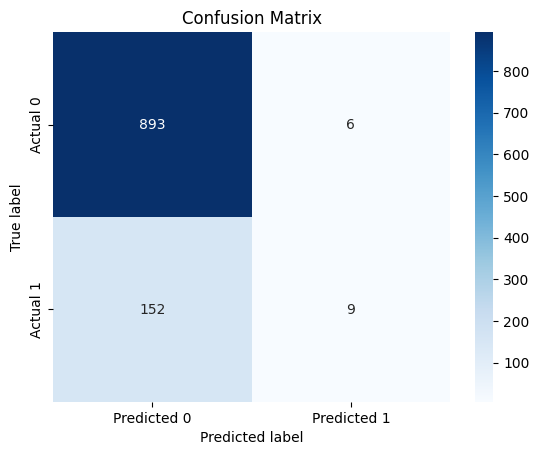

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       899
           1       0.60      0.06      0.10       161

    accuracy                           0.85      1060
   macro avg       0.73      0.52      0.51      1060
weighted avg       0.82      0.85      0.79      1060

